# df cluster


### loading libraries

In [1]:
import pandas as pd
import numpy as np

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

### loading csv files

In [2]:
df_price = pd.read_csv('./data/df_price_cluster.csv')
df_sales = pd.read_csv('./data/df_sales_cluster.csv')

### csv files exploration

In [3]:
df_price

,Unnamed: 0,item,price_min,price_max,price_mean
0,0,ACCESORIES_1_001,6.6500,12.7414,11.032755
1,1,ACCESORIES_1_002,2.6600,5.2801,5.275708
2,2,ACCESORIES_1_003,1.2502,7.9401,3.944125
3,3,ACCESORIES_1_004,5.0141,6.1712,5.983299
4,4,ACCESORIES_1_005,1.9950,4.0964,3.832119
...,...,...,...,...,...
3044,3044,SUPERMARKET_3_823,1.1880,3.5760,3.344609
3045,3045,SUPERMARKET_3_824,2.4000,3.2160,3.026692
3046,3046,SUPERMARKET_3_825,2.3880,5.2560,4.934385
3047,3047,SUPERMARKET_3_826,1.2000,1.5360,1.535790


In [4]:
df_sales

,Unnamed: 0,item,sales
0,0,ACCESORIES_1_001,4093
1,1,ACCESORIES_1_002,5059
2,2,ACCESORIES_1_003,1435
3,3,ACCESORIES_1_004,39175
4,4,ACCESORIES_1_005,14621
...,...,...,...
3044,3044,SUPERMARKET_3_823,15388
3045,3045,SUPERMARKET_3_824,8325
3046,3046,SUPERMARKET_3_825,13526
3047,3047,SUPERMARKET_3_826,12188


In [5]:

del(df_price['Unnamed: 0'])
del(df_sales['Unnamed: 0'])

### merge df_sales and df_prices

In [7]:
df_cluster = pd.merge(df_price, df_sales, on=['item'], how='left')
df_cluster.head(1)

,item,price_min,price_max,price_mean,sales
0,ACCESORIES_1_001,6.65,12.7414,11.032755,4093


In [8]:
df_cluster

,item,price_min,price_max,price_mean,sales
0,ACCESORIES_1_001,6.6500,12.7414,11.032755,4093
1,ACCESORIES_1_002,2.6600,5.2801,5.275708,5059
2,ACCESORIES_1_003,1.2502,7.9401,3.944125,1435
3,ACCESORIES_1_004,5.0141,6.1712,5.983299,39175
4,ACCESORIES_1_005,1.9950,4.0964,3.832119,14621
...,...,...,...,...,...
3044,SUPERMARKET_3_823,1.1880,3.5760,3.344609,15388
3045,SUPERMARKET_3_824,2.4000,3.2160,3.026692,8325
3046,SUPERMARKET_3_825,2.3880,5.2560,4.934385,13526
3047,SUPERMARKET_3_826,1.2000,1.5360,1.535790,12188


In [ ]:
# price_max = precio max
# price_min = precio min
# price_mean = precio promedio
# number_sales = total de productos vendidos

### Create column "total_income" that represent the total income for product

In [10]:

df_cluster['total_income']= df_cluster['price_mean']*df_cluster['sales']
df_cluster.head(2)

,item,price_min,price_max,price_mean,sales,total_income
0,ACCESORIES_1_001,6.65,12.7414,11.032755,4093,45157.065966
1,ACCESORIES_1_002,2.66,5.2801,5.275708,5059,26689.806185


In [14]:
df_cluster["total_income"]=df_cluster["total_income"].round(2)

In [16]:
df_cluster

,item,price_min,price_max,price_mean,sales,total_income
0,ACCESORIES_1_001,6.6500,12.7414,11.032755,4093,45157.07
1,ACCESORIES_1_002,2.6600,5.2801,5.275708,5059,26689.81
2,ACCESORIES_1_003,1.2502,7.9401,3.944125,1435,5659.82
3,ACCESORIES_1_004,5.0141,6.1712,5.983299,39175,234395.74
4,ACCESORIES_1_005,1.9950,4.0964,3.832119,14621,56029.42
...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,1.1880,3.5760,3.344609,15388,51466.84
3045,SUPERMARKET_3_824,2.4000,3.2160,3.026692,8325,25197.21
3046,SUPERMARKET_3_825,2.3880,5.2560,4.934385,13526,66742.50
3047,SUPERMARKET_3_826,1.2000,1.5360,1.535790,12188,18718.21


In [17]:
df_cluster.describe().T

,count,mean,std,min,25%,50%,75%,max
price_min,3049.0,3.630382,3.568067,0.012000,1.23750,2.400000,4.77600,3.588340e+01
price_max,3049.0,5.974956,5.517955,0.300000,2.85600,4.416000,7.47500,1.341500e+02
price_mean,3049.0,5.566813,4.538464,0.239601,2.62843,4.185494,7.19074,3.949448e+01
sales,3049.0,21546.542801,44252.433426,568.000000,4310.00000,9526.000000,21406.00000,1.002529e+06
total_income,3049.0,76059.791935,113715.621095,558.880000,21808.82000,43503.830000,84068.79000,1.759780e+06


### draw scatter plot

<Axes: xlabel='sales', ylabel='total_income'>

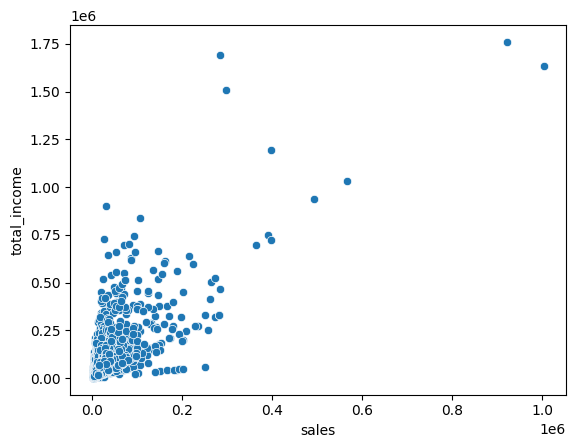

In [19]:
sns.scatterplot(data= df_cluster , x='sales', y='total_income')

In [20]:
df_cluster1 = df_cluster.copy()

### drop unnecessary columns

In [21]:
df_cluster1.drop(columns=['item','price_min','sales'], axis=1,inplace=True)

In [22]:
df_cluster1.head(1)

,price_max,price_mean,total_income
0,12.7414,11.032755,45157.07


## clustering

### scale my variables

In [23]:
from sklearn.preprocessing import StandardScaler
scaaler = StandardScaler()
df_cluster_scaled = scaaler.fit_transform(df_cluster1)

In [24]:
df_cluster_scaled.head()

,price_max,price_mean,total_income
0,1.226460,1.204557,-0.271799
1,-0.125947,-0.064152,-0.434224
2,0.356195,-0.357600,-0.619190
3,0.035570,0.091783,1.392614
4,-0.340500,-0.382283,-0.176173


### use PCA so to reduce dimensionality, overfitting and noise

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA()
pca.fit(df_cluster_scaled)
pca_data_scaled = pca.transform(df_cluster_scaled)
pca_data_scaled

,pca0,pca1,pca2
0,1.626421,-0.619428,-0.010100
1,-0.220739,-0.396789,0.048598
2,-0.128801,-0.611635,-0.497454
3,0.374372,1.344750,0.023575
4,-0.536415,-0.067714,-0.028139
...,...,...,...
3044,-0.684294,-0.077773,-0.037122
3045,-0.825419,-0.284251,-0.037943
3046,-0.203475,-0.041078,-0.005690
3047,-1.275241,-0.248219,-0.054854


In [28]:
var = pca.explained_variance_ratio_
print(var)

[0.64011615 0.31984516 0.04003869]


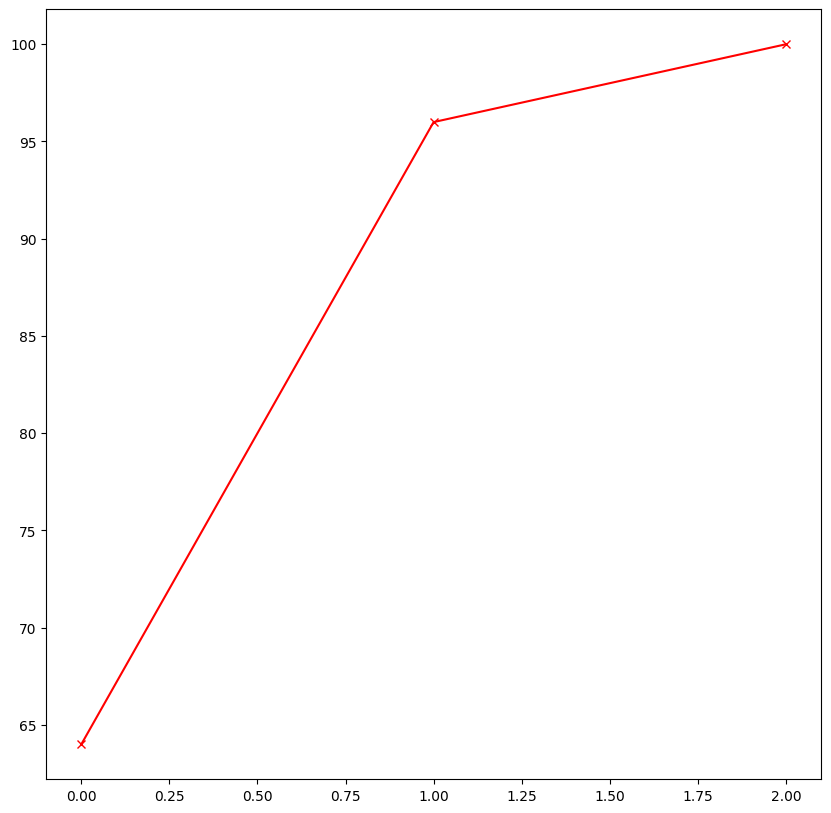

In [29]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

### visual test and evaluation


In [37]:
sum_of_squared_distances = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(df_cluster1)
    sum_of_squared_distances.append(km.inertia_)

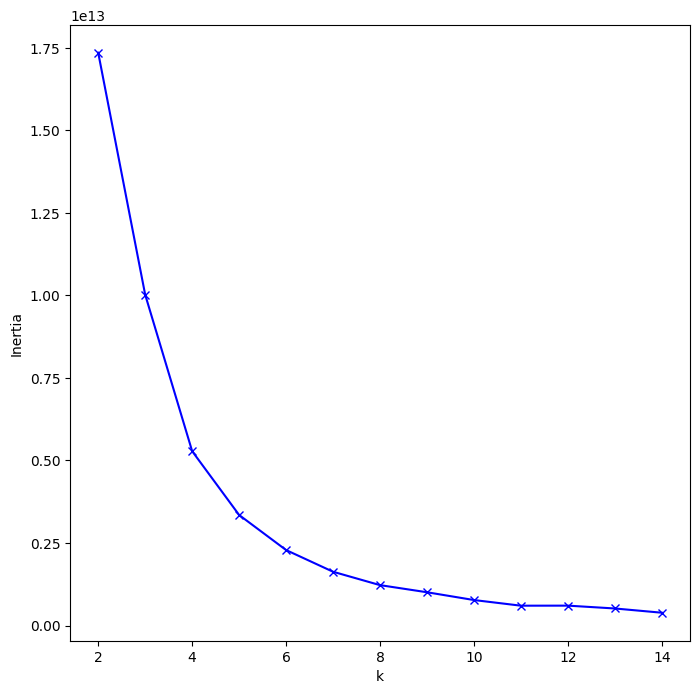

In [38]:
plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

### Use Kmean for identify "the elbow"

In [40]:

km = KMeans(n_clusters = 4,  random_state=42)
y = km.fit_predict(df_cluster1)

df_cluster['k_means'] = y

In [41]:

df_cluster.head(2)

,item,price_min,price_max,price_mean,sales,total_income,k_means
0,ACCESORIES_1_001,6.65,12.7414,11.032755,4093,45157.07,0
1,ACCESORIES_1_002,2.66,5.2801,5.275708,5059,26689.81,0


In [47]:
df_cluster1

,price_max,price_mean,total_income
0,12.7414,11.032755,45157.07
1,5.2801,5.275708,26689.81
2,7.9401,3.944125,5659.82
3,6.1712,5.983299,234395.74
4,4.0964,3.832119,56029.42
...,...,...,...
3044,3.5760,3.344609,51466.84
3045,3.2160,3.026692,25197.21
3046,5.2560,4.934385,66742.50
3047,1.5360,1.535790,18718.21


# merge both df_cluster and df_clusteizado con originalso to plot the clusters

In [48]:

df_clusterizado = df_cluster.merge(df_cluster1, on =['price_max','price_mean','total_income'], how='left')
df_clusterizado.head(2)

,item,price_min,price_max,price_mean,sales,total_income,k_means
0,ACCESORIES_1_001,6.65,12.7414,11.032755,4093,45157.07,0
1,ACCESORIES_1_002,2.66,5.2801,5.275708,5059,26689.81,0


<function matplotlib.pyplot.show(close=None, block=None)>

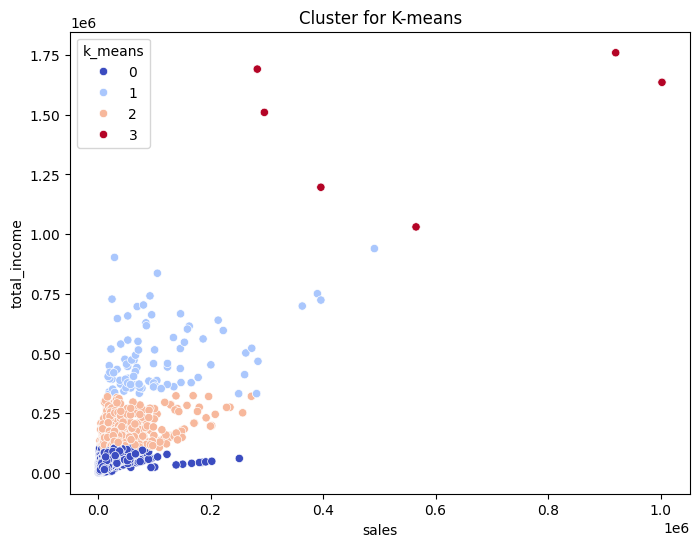

In [54]:
plt.figure(figsize=(8,6))
plt.title('Cluster for K-means')
sns.scatterplot(data=df_cluster, x='sales', y='total_income', hue='k_means',palette='coolwarm')
plt.show

In [79]:
df_cluster.sample(1)

,item,category,price_min,price_max,price_mean,sales,total_income,k_means
1127,HOME_&_GARDEN_2_031,HOME_&_GARDEN,7.425,7.425,7.425,3713,27569.02,0


In [56]:
df_cluster["category"] = df_cluster["item"].apply(lambda x: x[:-6])

In [72]:
del(df_cluster['percentage'])

In [74]:
columns = ["item", "category", "price_min", "price_max", "price_mean", "sales", "total_income","k_means", ]

In [75]:
df_cluster = df_cluster[columns]

In [80]:
df_cluster.sample(1)

,item,category,price_min,price_max,price_mean,sales,total_income,k_means
2032,SUPERMARKET_2_206,SUPERMARKET,9.576,13.848,12.796039,5012,64133.75,0


In [77]:
# file_name = "df_cluster.csv"
# df_cluster.to_csv(file_name)